# BITCOIN PREDICTION

## IMPORTS

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

BATCH_SIZE = 5
EPOCHS = 3
DAYS = 60

## DATA PREPROCESSING

In [3]:
training_set = pd.read_csv(r"Dataset\BTC-INR.csv", index_col="Date")
training_set.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [4]:
training_set.dropna(inplace=True)
training_set.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
training_set = training_set.iloc[:, 0:1].values
training_set

array([[ 734975.875  ],
       [ 726121.     ],
       [ 732944.3125 ],
       [ 725136.875  ],
       [ 713777.125  ],
       [ 716845.5625 ],
       [ 688840.6875 ],
       [ 610569.     ],
       [ 602520.75   ],
       [ 575799.3125 ],
       [ 583026.75   ],
       [ 581420.875  ],
       [ 571411.375  ],
       [ 586339.6875 ],
       [ 593356.9375 ],
       [ 597016.9375 ],
       [ 586653.5    ],
       [ 581483.8125 ],
       [ 577213.     ],
       [ 565835.625  ],
       [ 586272.6875 ],
       [ 586129.25   ],
       [ 610579.5    ],
       [ 609467.625  ],
       [ 590828.     ],
       [ 592336.875  ],
       [ 590146.6875 ],
       [ 596583.75   ],
       [ 586634.1875 ],
       [ 574326.5    ],
       [ 576219.4375 ],
       [ 566861.6875 ],
       [ 568568.125  ],
       [ 584312.125  ],
       [ 584617.9375 ],
       [ 572152.3125 ],
       [ 531125.5625 ],
       [ 531911.8125 ],
       [ 614011.1875 ],
       [ 654682.5    ],
       [ 677591.8125 ],
       [ 654281.

## FEATURE SCALING

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
training_set_sc = sc.fit_transform(training_set)
training_set_sc

array([[8.24808392e-02],
       [8.04702436e-02],
       [8.20195509e-02],
       [8.02467873e-02],
       [7.76674327e-02],
       [7.83641547e-02],
       [7.20053435e-02],
       [5.42329063e-02],
       [5.24054637e-02],
       [4.63380709e-02],
       [4.79791391e-02],
       [4.76145078e-02],
       [4.53417420e-02],
       [4.87313776e-02],
       [5.03247205e-02],
       [5.11557632e-02],
       [4.88026321e-02],
       [4.76287984e-02],
       [4.66590640e-02],
       [4.40757074e-02],
       [4.87161645e-02],
       [4.86835955e-02],
       [5.42352904e-02],
       [5.39828271e-02],
       [4.97504977e-02],
       [5.00931042e-02],
       [4.95957983e-02],
       [5.10574033e-02],
       [4.87982470e-02],
       [4.60036528e-02],
       [4.64334648e-02],
       [4.43086860e-02],
       [4.46961512e-02],
       [4.82709975e-02],
       [4.83404355e-02],
       [4.55099799e-02],
       [3.61944105e-02],
       [3.63729371e-02],
       [5.50144924e-02],
       [6.42493559e-02],


## APPROPRIATE DATA STRUCTURE

In [7]:
X_train = []
y_train = []
for i in range(DAYS, len(training_set_sc)):
    X_train.append(training_set_sc[i-DAYS:i, 0])
    y_train.append(training_set_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## BUILDING THE RNN USING LSTM

### INITIALIZING THE MODEL

In [8]:
rnn = tf.keras.models.Sequential()

### FIRST LAYER (LSTM)

In [9]:
rnn.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(DAYS, 1)))

In [10]:
rnn.add(tf.keras.layers.Dropout(0.2))

### HIDDEN LAYER (LSTM)

In [11]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75))
rnn.add(tf.keras.layers.Dropout(0.2))

### OUTPUT LAYER (ANN)

In [12]:
rnn.add(tf.keras.layers.Dense(1))

### COMPILING OUR MODEL

In [13]:
rnn.compile(optimizer="adam", loss="mean_squared_error")

## TRAINING OUR MODEL

LSTM TAKES 3D INPUT = (Batch_size, timesteps, output)

In [14]:
X_train = X_train.reshape(len(X_train), DAYS, 1)
rnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/3
112/112 [==============================] - 28s 123ms/step - loss: 0.0182
Epoch 2/3
112/112 [==============================] - 12s 110ms/step - loss: 0.0084
Epoch 3/3
112/112 [==============================] - 12s 106ms/step - loss: 0.0088


## CREATING DATASET FOR PREDICTION

In [15]:
train_set = pd.read_csv(r"Dataset\BTC-INR.csv", index_col="Date")
train_set.dropna(inplace=True)

In [16]:
test_set = pd.read_csv(r"Dataset\BTC-INRtest.csv", index_col="Date")
test_set.dropna(inplace=True)

In [17]:
whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values

In [18]:
previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)


### SCALING THE TEST_DATA

In [19]:
scaled_test_data = sc.transform(previous30days.reshape(-1, 1))

In [20]:
scaled_test_data = scaled_test_data.reshape(-1, DAYS)

### RESHAPING THE VALUES TO 3D (BATCH_SIZE, TIMESTEPS, OUTPUT)

In [21]:
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)

In [22]:
y_pred = sc.inverse_transform(rnn.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)

## PLOTTING THE GRAPH

In [23]:
predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata

,Open,Predicted
Date,,
2019-09-18,7.349759e+05,NaN
2019-09-19,7.261210e+05,NaN
2019-09-20,7.329443e+05,NaN
2019-09-21,7.251369e+05,NaN
2019-09-22,7.137771e+05,NaN
...,...,...
2021-07-02,2.501374e+06,3417043.50
2021-07-03,2.521546e+06,3408229.50
2021-07-04,2.581994e+06,3399180.25


In [24]:
plotdata = plotdata.iloc[500:, :]

In [25]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

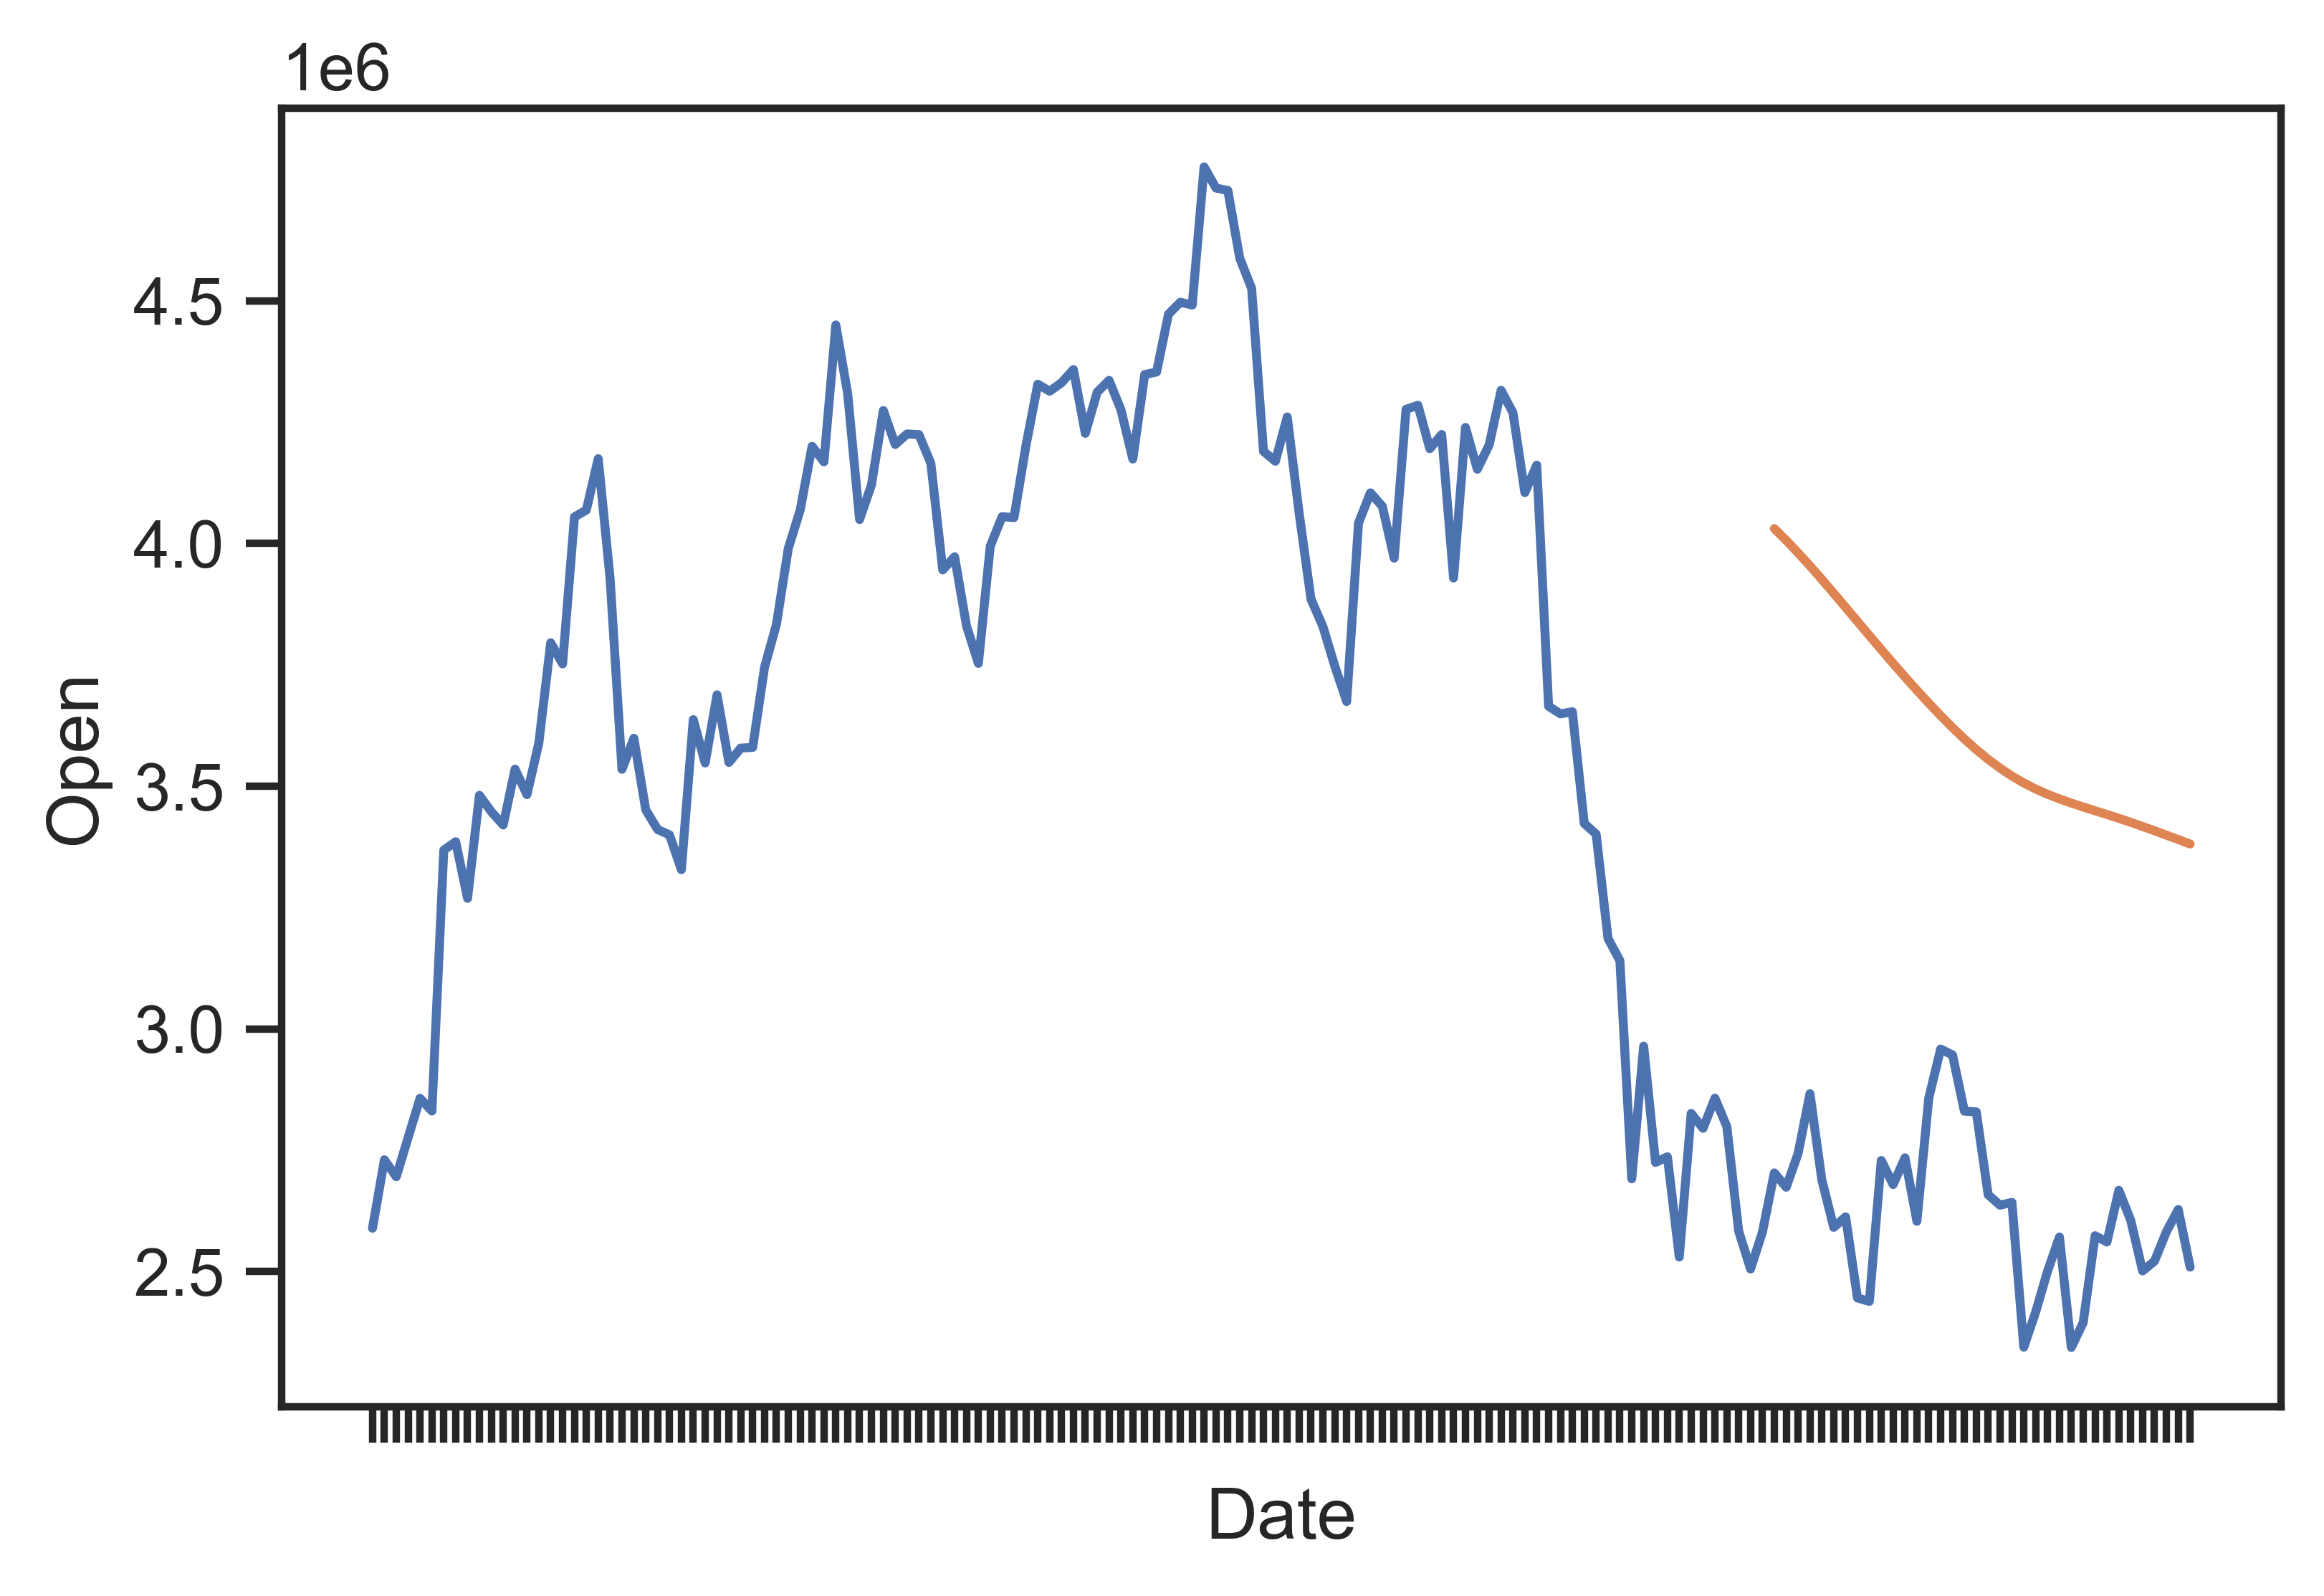

In [26]:
ax1 = sns.lineplot(data=plotdata["Open"]).set(xticklabels=[])
ax2 = sns.lineplot(data=plotdata["Predicted"]).set(xticklabels=[])

In [306]:
B = BATCH_SIZE
D = DAYS
E = EPOCHS
name = f"_B{B}_E{E}_D{D}"
filename = "./Predictions/BTC-Predictions"+name
rnn.save(filename)

INFO:tensorflow:Assets written to: ./Predictions/BTC-Predictions_B16_E20_D60\assets


INFO:tensorflow:Assets written to: ./Predictions/BTC-Predictions_B16_E20_D60\assets


## AFTER LOADING

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
B = BATCH_SIZE
E = EPOCHS
D = DAYS

In [3]:
model = tf.keras.models.load_model(f'./Predictions/BTC-Predictions_B{B}_E{E}_D{D}')

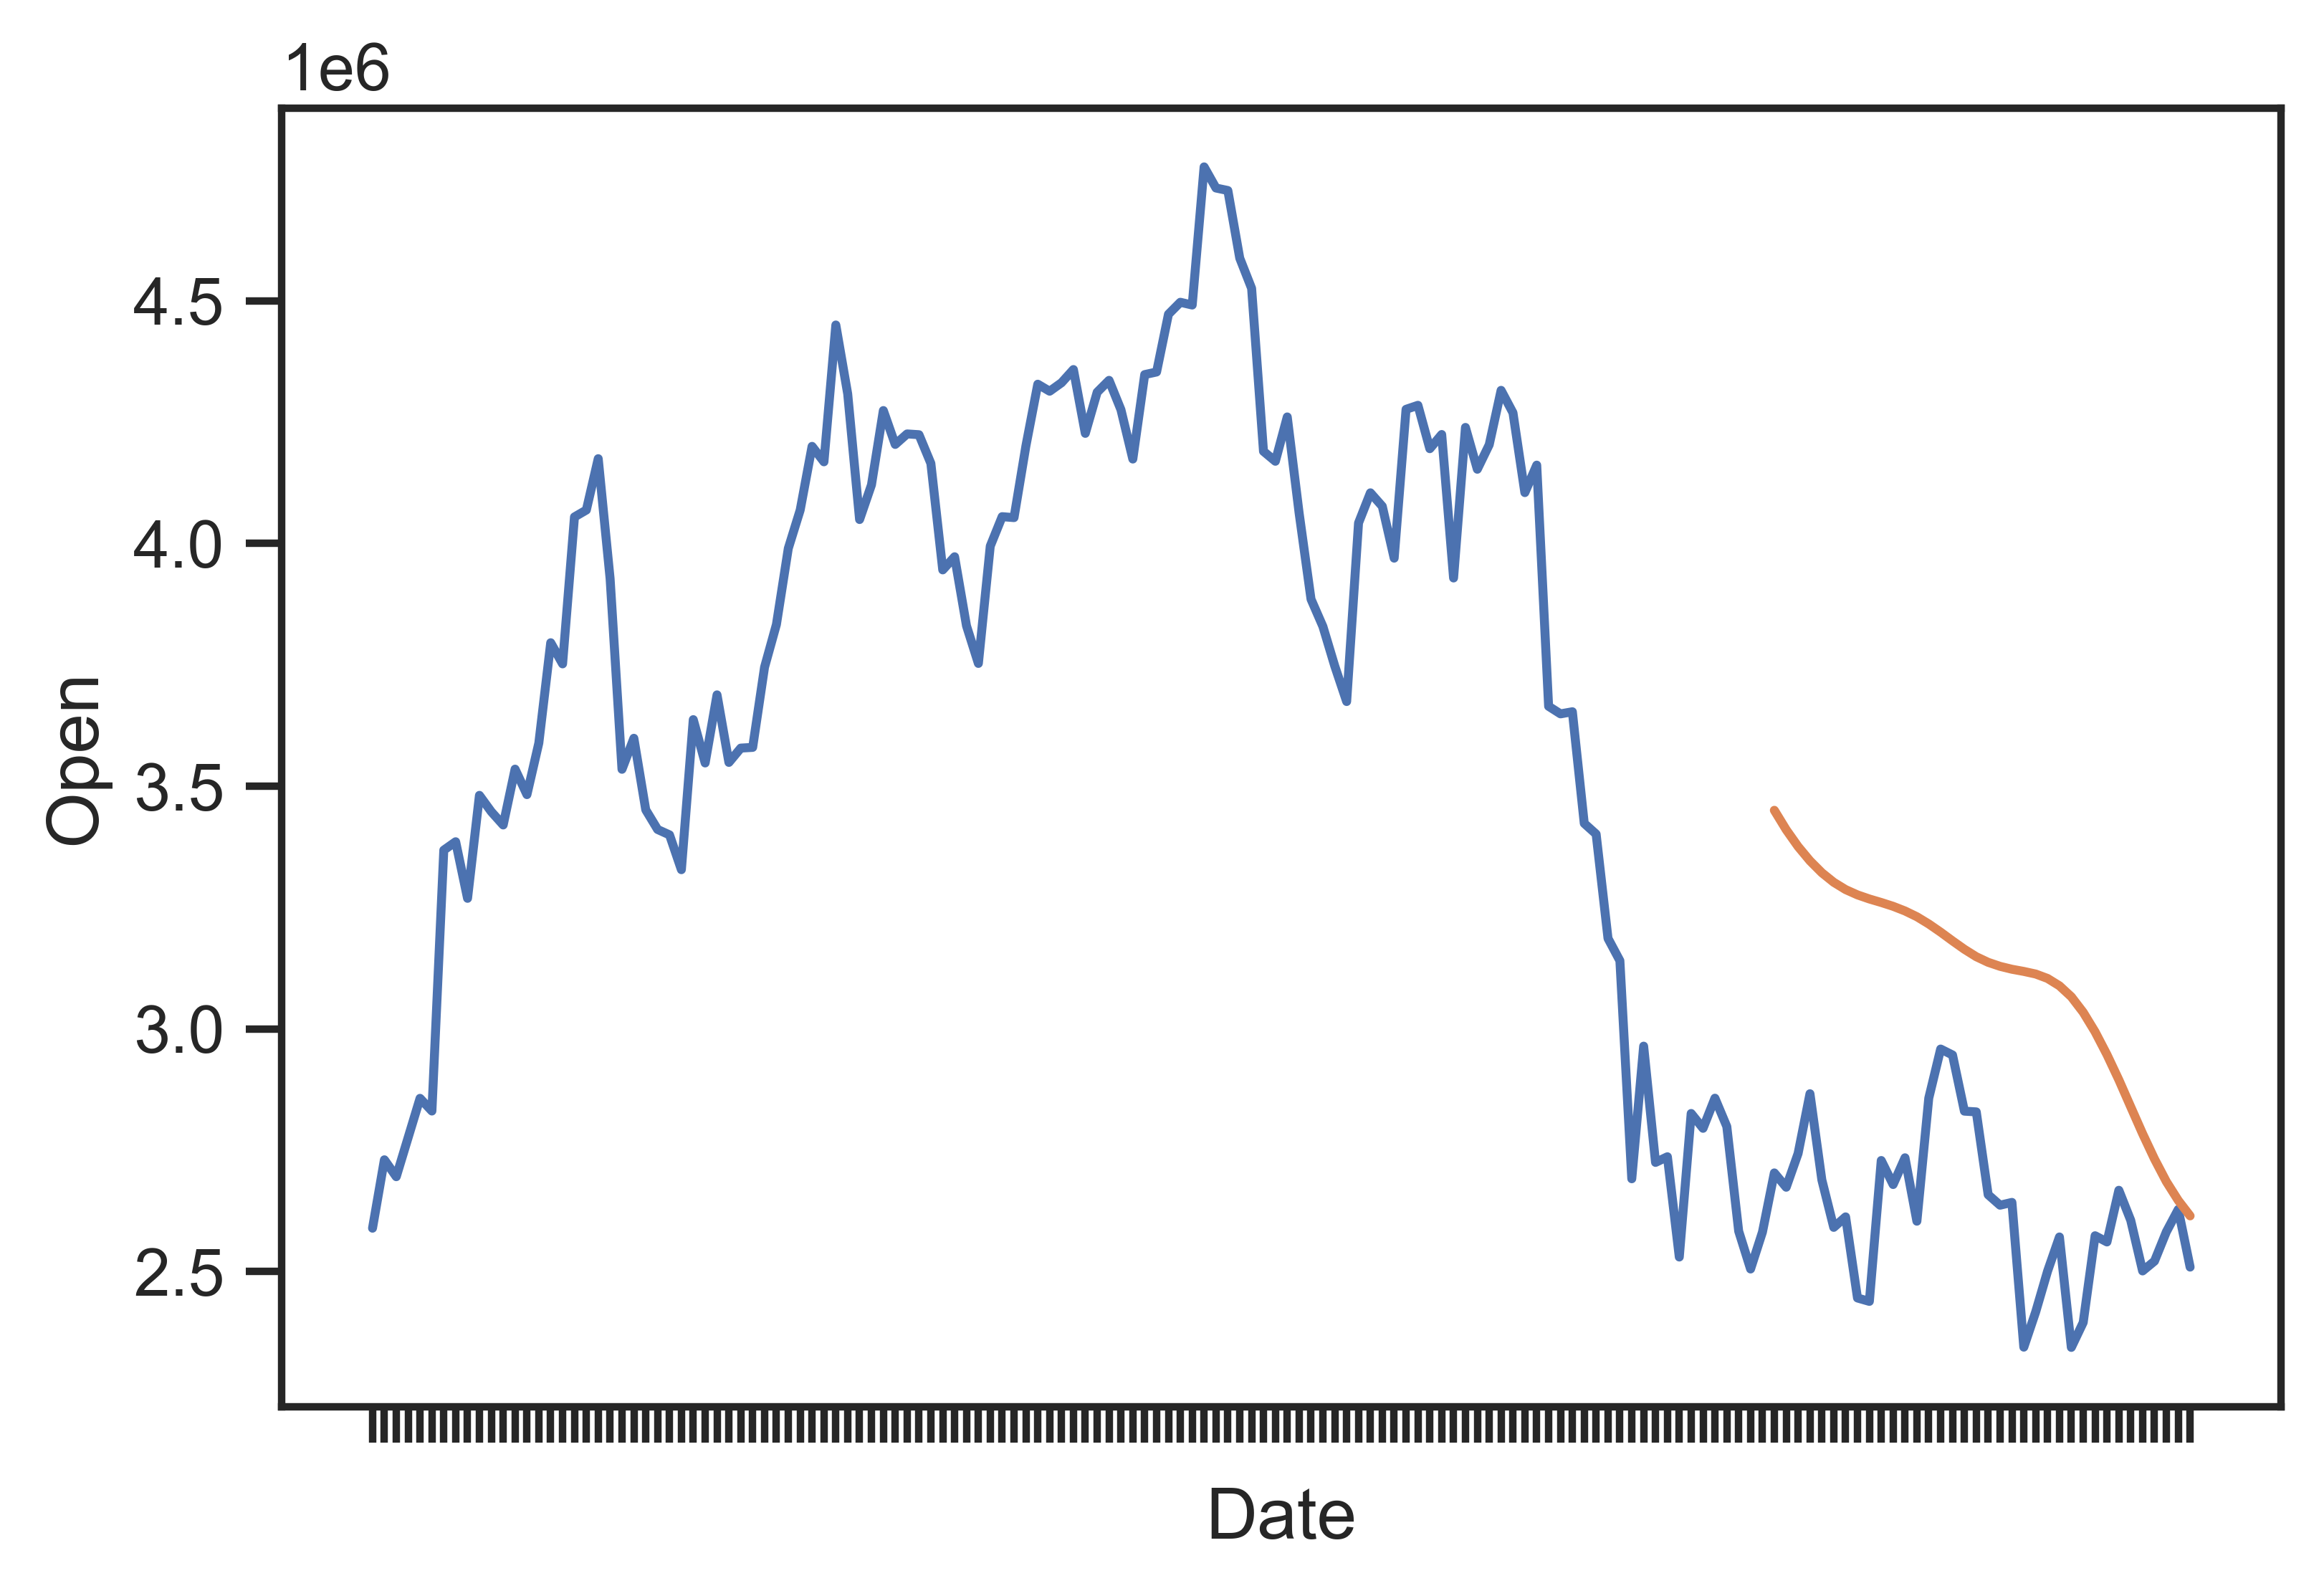

In [9]:
train_set = pd.read_csv(r"Dataset\BTC-INR.csv", index_col="Date")
train_set.dropna(inplace=True)
test_set = pd.read_csv(r"Dataset\BTC-INRtest.csv", index_col="Date")
test_set.dropna(inplace=True)
whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values
previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_test_data = sc.fit_transform(previous30days.reshape(-1, 1))
scaled_test_data = scaled_test_data.reshape(-1, DAYS)
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)
y_pred = sc.inverse_transform(model.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)
predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata = plotdata.iloc[500:, :]
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
ax1 = sns.lineplot(data=plotdata["Open"]).set(xticklabels=[])
ax2 = sns.lineplot(data=plotdata["Predicted"]).set(xticklabels=[])